<h2>Welcome to Teradata SQL extension for Jupyter </h2>
<p>
This notebook provides information to help you get started with the Teradata kernel and extensions for JupyterLab.  Note that you must add Teradata NewSQL Engine connections in order to execute SQL statements within your notebook.  
    
[Visit our landing page for more information and downloads](https://teradata.github.io/jupyterextensions/)
<p>
<h2>Features</h2>

<h3> The SQL Kernel Provides:</h3>
<ul>
<li>Connection management to add, remove, connect, and list connections</li>
<li>Query engine that uses embedded Teradata SQL driver</li>
<li>SQL aware notebook with SQL content assist and syntax checking</li>
<li>Result set renderer that displays result data in easy to read, pageable grid</li>
<li>Execution history that stores execution metadata to recall SQL commands at a later time</li>
<li>Visualization using VegaLite library to display charts, graphs, plots, etc.</li>
<li>Magic commands that provide additional custom kernel options to enhance Teradata user experience</li>
</ul>


<h3> The Navigator Provides:</h3>
<ul>
<li>The ability for users to explore the NewSQL Engine catalog, regardless of the language you are using in your notebook (SQL, Python, R).</li>
<li>Hierarchical display of SQL object relational model</li>
<li>Column metadata showing data type and indexes</li>
<li>Row Count and Column Distribution menu options</li>
</ul>

<h4>Refer to the GettingStartedDemo notebook for a live example running Teradata SQL kernel magics.</h4>


<h2>Using the Navigator</h2>
<p>
<ul>
<li>Launched from JupyterLab Launcher or Commands list</li>
<li>Select connection profile (Connection profiles are created using the Teradata SQL Notebook)</li>
<li>Column data type metadata provided</li>
<li>Right click options available (such as Row Count)</li>
</ul>


***
## Teradata SQL Kernel
#### A Teradata SQL Notebook can be opened by selecting the Teradata icon on the launcher page

***
## Magic commands (aka magics)
#### The Teradata SQL Kernel supports a set of magics that can be use to perform a variety of operations
Full list of magics provided with Teradata SQL Kernel can be seen by entering %help.<br><br>
Some magic commands have parameters in the form name=value, name2=value2.<br>
In these cases
1. the parameter names are not case sensitive
2. the values can be quoted with double quotes. Quoting of values is only required if the value contains any of the characters , = " \n

In [ ]:
%help

#### A list of the "magics" without descriptions can be displayed with the %lsmagic command

In [14]:
%lsmagic

%addconnect
%connect
%disconnect
%rmconnect
%lsconnect
%chart
%table
%meta
%history
%pyinfo
%rinfo
%runsto
%installfile
%rmfile
%showfile
%lsmagic
%quickref
%help


#### Help for a specific command can be displayed by adding the command name (without the %)

In [15]:
%help chart

%chart x=<XColumnName>, y=<YColumnName>,
	[title=<ChartTitle>,] [id=<ResultSetID>|<HistoryID>,] [part=<PartNum>]
	[labelx=<XLabel>,] [labely=<YLabel>,]
	[gridx=true|false,] [gridy=true|false,]
	[typex=q|n|o|t,] [typey=q|n|o|t,]
	[mark=area|bar|circle|line|point|rect|rule|square|text|tick,]
	Display a Vega-Lite visualization of the most recently accessed or specified result set.
		typex and typey values: q=quantitative n=nominal o=ordinal t=temporal (defaults based on column type:
		numeric types -> quantitative, time times -> temporal, other types -> nominal)
		<ResultSetID> is the timestamp/directory name of the result set.
		<HistoryID> is the id of the history item (see %history command).
		If the id is not specified, the most recently accessed result set is displayed.

***
## Managing Teradata NewSQL Engine connections

Before accessing a Teradata NewSQL Engine, we need to create a connection.<br>
This is a two step process.
1. add a new connection definition (%addconnect) (if one does not already exist)
2. connect (%connect)
***

### List existing connections with the %lsconnect command


In [16]:
%lsconnect

Disconnected: NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Add a new connection with the %addconnect command
- **NAME** - the user-assigned name of the connection to be created
- **USER** - the user name to log in
- **HOST** - the host name or IP address

The parameter names are not case sensitive (NAME, name, Name, etc).

In [17]:
%help addconnect

%addconnect NAME=<Connection Name>, USER=<User Name>, HOST=<Database Server Name or IP Address>[, PROPS="<DB Properties>"]
	Add a Teradata database connection specification. Parameter names (NAME, USER, HOST, etc) are not case sensitive.
	By default, the connection to the database is encrypted. To disable encryption (not recommended), use PROPS="encryptdata=false".
	By default, the 'tmode' property is set to 'DEFAULT'. Valid options are ANSI | TERA | DEFAULT. To change the tmode setting, 
	to ANSI, for example, use PROPS="tmode=ANSI".
	Multiple DB properties can be passed in a comma-separated list, i.e. props="encryptdata=false, tmode=ANSI".
	The connection specification will be saved and can be used in the %connect, %disconnect and %rmconnect commands.

### Remove a connection with the %rmconnect magic

In [18]:
%help rmconnect

%rmconnect <Connection Name>
	Remove the named connection specification

### Connect with the %connect command
The connection name is required. The password is required if this connection is not yet connected.
If the password is required and is not specified, a password prompt will be displayed to allow the password to be entered in a hidden text field.
It is generally more secure not to specify the password on the %connect command because the password will be visible on-screen and will be saved as part of the notebook.

In [19]:
%help connect

%connect | %%connect [NAME=]<Connection Name> [,[PASSWORD=]<Password>] [,ROWCOUNT=<rowcount>]
	%connect will make the named connection the active connection.
	If rowcount is passed in, the kernel will use	the rowcount to limit the number of rows displayed in
	the result set. Setting the rowcount must use the name/value pair syntax, such as "rowcount=100".
	%%connect is a cell magic command and can be followed in the same cell by a SQL statement
		This will set the connection used for this SQL statement but will not change the active connection.
	Password is required only if not already connected. If the password is required and is not specified,
		a password prompt will be displayed and the password can be entered in a hidden text field (recommended).
	Rowcount is optional and must use the name/value pair syntax. If rowcount is provided, it will only be applied to 
	the result set returned for the cell SQL statement.
	
	'%help rowcount' command will display the current rowcount value.

### Select the Teradata NewSQL Engine to connect to

In [59]:
%lsconnect

Disconnected: NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


In [61]:
%connect teradata-vantage

Password ···


Success: 'teradata-vantage' connection established


#### When a connection is first established, it will prompt you for the password. It will be shown in the %lsconnect output as '*Connected'
The asterisk indicates that this is the active connection (only one connection is **active** at a time, although more that one can be **connected**)

In [79]:
%connect peach

Success: 'peach' connection established


In [80]:
%lsconnect

*Connected:   NAME=peach, USER=dbc, HOST=peach1
Connected:    NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Make a connection active with the %connect command
If already connected, the %connect command will make the specified connection the active connection. No password is required in this case.

In [81]:
%connect teradata-vantage

Success: 'teradata-vantage' connection established


In [82]:
%lsconnect

Connected:    NAME=peach, USER=dbc, HOST=peach1
*Connected:   NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Disconnect with the %disconnect command

In [84]:
%disconnect teradata-vantage

Success: 'teradata-vantage' disconnected

In [85]:
%lsconnect

Connected:    NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


***
## Executing SQL

### To execute SQL, simply enter the SQL in a cell and execute the cell (shift-enter or the run button in the toolbar)
#### The active connection will be used to run the SQL. Query results (if any) will be displayed in a table.
#### Hitting the Tab key provides content assist, for example the list of databases, tables, available.  This query is just an example, you'll need to specify one that will run on your selected connection.

In [86]:
%connect peach

Success: 'peach' connection established


In [65]:
select top 25 * from guest.SalesDemo;

Sales_Center_ID,UNITS,SALES,COST
3333,5.0000,32.00,12.80
5555,1.0000,7.97,3.89
6666,1.0000,18.75,5.20
7777,.0000,.00,.00
9999,.0000,.00,.00
1112,1.0000,8.00,2.65
1113,5.0000,39.42,10.68
1114,5.0000,35.58,15.84
1115,.0000,.00,.00
1116,1.0000,17.18,2.69


### The result of SQL statements that do not return a result set is summarized in the output cell.

In [66]:
update guest.SalesDemo set UNITS = '3' where Sales_Center_ID = '1115';

Success: 1 rows affected

### Errors are also shown in the output cell

In [27]:
select * from NonExistentTable;

ERROR: No active connection

### Cancelling a long running query
#### Hitting the 'Interrupt the kernel' toolbar button will cancel the currently executing query.

In [67]:
select * from SSB.LINEORDER_10M_ROWS

ERROR: Request Canceled

### Execute SQL on a specific connection (not necessarily the active connection) with the %%connect cell magic command
#### Follow the %%connect command with SQL in the same cell

In [87]:
%%connect teradata-vantage
select top 25 * from alice.kmeanssample; 

Password ···


Success: 'teradata-vantage' connection established


id,point1,point2,point3,point4,point5
1,16.21,9.07,6.19,20.93,8.74
2,18.09,14.05,10.86,6.56,11.35
7,-7.17,-7.89,-9.07,-8.26,-11.86
12,2.72,2.08,0.12,-1.48,1.58
13,-3.7,-0.1,-1.91,0.21,1.12
11,0.96,1.18,-0.35,1.25,-0.31
9,-4.71,-10,-5.21,-6.31,-2.45
10,2.13,2.99,-13.33,-11.49,-9.35
15,2.74,-0.05,-1.87,2.58,-1.96
14,-1.09,-3.09,1.58,-0.77,1.47


#### The %%connect cell magic only specifies the connection to use for the SQL in the same cell; it will not change the active connection

In [88]:
%lsconnect

*Connected:   NAME=peach, USER=dbc, HOST=peach1
Connected:    NAME=teradata-vantage, USER=dbc, HOST=vantage1


***
## History

### List the history of SQL commands executed with the %history command

In [35]:
%help history

%history [limit[,start]]
	Display a list of previously executed commands.
	Limit is the number of history items to display. The default limit is 20. 
	Start is the starting position to list. The default is the most recent items.

In [71]:
%history

HistID:         <ResultSetID>         [ConnID]         SQL
    35: <2019.04.17_20.10.46.999_UTC> [peach] select top 25 * from dbc.databasesvx
    34: <2019.04.17_20.10.44.297_UTC> [peach] select top 25 * from dbc.databasesv
    33: <2019.04.17_20.10.41.865_UTC> [peach] select top 25 * from dbc.databases
    32: <2019.04.17_20.10.35.460_UTC> [peach] select top 25 * from dbc.tablesvx
    31: <2019.04.17_20.10.04.058_UTC> [peach] select top 25 * from dbc.columnsvx;
    30: <2019.04.17_20.10.00.604_UTC> [peach] select top 25 * from dbc.columnsv;
    29: <2019.04.17_20.09.57.232_UTC> [peach] select top 25 * from dbc.columns;
    28: <2019.04.17_20.09.50.278_UTC> [peach] select top 25 * from dbc.tables;
    27: <2019.04.17_20.09.47.569_UTC> [peach] select top 25 * from dbc.tablesv;
    26: <2019.04.17_20.09.40.879_UTC> [peach] select top 25 * from dbc.dbcinfo;
    25: <2019.04.17_20.09.20.979_UTC> [peach] select top 25 * from taademo.fact_loan;
    24:  2019-04-17_20:09:13.584_UTC  [peach] s

- **HistID** column is the sequential id of each history item
- **ResultSetID** column is the id of the result set produced by the SQL in this history item<br>
  If the SQL produced a result set, the result set id will be enclosed in <><br>
  If no result set was produced (error, or SQL that does not return results) the result set id is not enclosed in <> and represents just a timestamp
- **ConnID** column is the name of the connection this SQL was executed on
- **SQL** column is the SQL that was executed

### By default the most recent 20 items will be displayed
#### The **limit** can be specified to change the number of items displayed.

In [72]:
%history 5

HistID:         <ResultSetID>         [ConnID]         SQL
    35: <2019.04.17_20.10.46.999_UTC> [peach] select top 25 * from dbc.databasesvx
    34: <2019.04.17_20.10.44.297_UTC> [peach] select top 25 * from dbc.databasesv
    33: <2019.04.17_20.10.41.865_UTC> [peach] select top 25 * from dbc.databases
    32: <2019.04.17_20.10.35.460_UTC> [peach] select top 25 * from dbc.tablesvx
    31: <2019.04.17_20.10.04.058_UTC> [peach] select top 25 * from dbc.columnsvx;


#### **Start** can be specified to change the history id to display from.

In [76]:
%history 5,25

HistID:         <ResultSetID>         [ConnID]         SQL
    29: <2019.04.17_20.09.57.232_UTC> [peach] select top 25 * from dbc.columns;
    28: <2019.04.17_20.09.50.278_UTC> [peach] select top 25 * from dbc.tables;
    27: <2019.04.17_20.09.47.569_UTC> [peach] select top 25 * from dbc.tablesv;
    26: <2019.04.17_20.09.40.879_UTC> [peach] select top 25 * from dbc.dbcinfo;
    25: <2019.04.17_20.09.20.979_UTC> [peach] select top 25 * from taademo.fact_loan;


***
## Visualization

### The %chart command is used to produce a graphical visualization of SQL query result sets
#### The %chart command produces and displays a __[Vega-lite](https://vega.github.io/vega-lite/)__ specification using the specified parameters and a result set as input

In [39]:
%help chart

%chart x=<XColumnName>, y=<YColumnName>,
	[title=<ChartTitle>,] [id=<ResultSetID>|<HistoryID>,] [part=<PartNum>]
	[labelx=<XLabel>,] [labely=<YLabel>,]
	[gridx=true|false,] [gridy=true|false,]
	[typex=q|n|o|t,] [typey=q|n|o|t,]
	[mark=area|bar|circle|line|point|rect|rule|square|text|tick,]
	Display a Vega-Lite visualization of the most recently accessed or specified result set.
		typex and typey values: q=quantitative n=nominal o=ordinal t=temporal (defaults based on column type:
		numeric types -> quantitative, time times -> temporal, other types -> nominal)
		<ResultSetID> is the timestamp/directory name of the result set.
		<HistoryID> is the id of the history item (see %history command).
		If the id is not specified, the most recently accessed result set is displayed.

- <b>x</b> and **y** - represent the x and y axes of the graph. These values must be specified.
- **title** - the title displayed above the chart (optional)
- **id** - the history id or result set id to use as input (most recently accessed if not specified)
- **labelx** - the label of the x axis (default is the x column name)
- **labely** - the label of the y axis (default is the y column name)
- **gridx** - whether to show grid lines for the x axis (default is true)
- **gridy** - whether to show grid lines for the y axis (default is true)
- **mark** - the type of chart to show (bar, line, area, point, rect, square, text, tick) (default is bar)
- **typex** and **typey** - the data type of the x and y axes __[(see the vega-lite specification)](https://vega.github.io/vega-lite/docs/type.html)__
    - q=quantitative - represents quatity values - generally numeric values
    - n=nominal - categorical data values based only on their names or categories. E.g., gender, nationality, music genre.
    - o=ordinal - represents ranked order (1st, 2nd, …) by which the data can be sorted. There is no notion of relative degree of difference between values
    - t=temporal - time and date/time values
    - default types are assigned based on the column data types
        - numeric types -> quantitative
        - time times -> temporal
        - other types -> nominal


### Execute a query, this is just an example

In [ ]:
select top 25 * from alice.kmeanssample;

#### By default %chart uses the most recently accessed result set as input.
#### In this case the result set in the cell above will be used.
Note that all fields in this table are defined as text fields, so **typey=q** is required to cause a column to be interpreted as quantitative (numeric).<br>

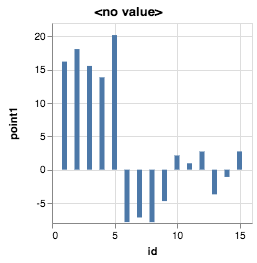

In [41]:
%chart x=id, y=point1, typey=q

#### The type of chart can be changed by specifying the **mark** parameter. 
By default, the type of chart is **bar** chart. To change the above chart to a **point** chart, add **mark=point** to the %chart command.

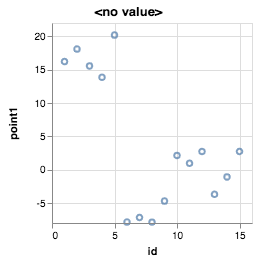

In [42]:
%chart x=id, y=point1, typey=q, mark=point

### Visualizing other result sets
#### The %chart command can also be used to visualized an older result set by specifying the **id** parameter as a **history id** or a **result set id**

#### **history id** is a numeric value

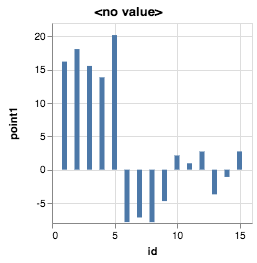

In [43]:
%chart x=id, y=point1, typey=q, id=8

***
## Display previous result set with the %table command
#### Like the %chart command, the %table command can be used to show a previous result set based on **history id** or **result set id**

In [91]:
%history 7,3

HistID:         <ResultSetID>         [ConnID]         SQL
     9:  2019-04-17_17:50:27.157_UTC  [test] Database guest
     8: <2019.04.17_04.23.16.858_UTC> [teradata-vantage] select top 25 * from alice.kmeanssample; 
     7:  2019-04-17_04:21:27.128_UTC  [teradata-vantage] select top 25 * from taademo.TDAT_Brand; 
     6:  2019-04-17_04:20:54.849_UTC  [peach] update taademo.TDAT_Brand set Brand_Category_ID = 'AA' where Brand_ID = '00223';
     5:  2019-04-17_04:20:33.834_UTC  [peach] update taademo.TDAT_Brand set Brand_Catogory_ID = 'AA' where Brand_ID = '00223';
     4: <2019.04.17_04.18.10.207_UTC> [peach] select top 25 * from taademo.TDAT_Brand;
     3: <2019.04.17_04.17.24.289_UTC> [peach] select top 25 * from taademo.TDAT_Brand;


In [93]:
%table 8

id,point1,point2,point3,point4,point5
1,16.21,9.07,6.19,20.93,8.74
2,18.09,14.05,10.86,6.56,11.35
7,-7.17,-7.89,-9.07,-8.26,-11.86
12,2.72,2.08,0.12,-1.48,1.58
13,-3.7,-0.1,-1.91,0.21,1.12
11,0.96,1.18,-0.35,1.25,-0.31
9,-4.71,-10,-5.21,-6.31,-2.45
10,2.13,2.99,-13.33,-11.49,-9.35
15,2.74,-0.05,-1.87,2.58,-1.96
14,-1.09,-3.09,1.58,-0.77,1.47


***
## Sharing Result Sets
#### Teradata result sets can easily be used in another type of notebook (e.g. Python or R)
Result sets are stored under the Teradata/ResultSets directory that is created in the JupterLab working directory (the directory in which 'juptyer lab' command is executed).
Under the Teradata/ResultSets directory is a set of directories named with a timestamp (e.g. 2019.04.17_13.37.30.129_PDT). Each of these directories contains a single result set. Within a result set directory are two types of JSON files. The file named 00000.json is the result set metadata. It defines the data types of each column in the result set as well as some general information. The other files are named 00001.json, 00002.json, etc. These are result set chunk files. Each of these files contains part of the result set data. Only large result sets will be split into multiple parts; many will be contained in a single 00001.json file.<br><br>
These chunk files contain a JSON formatted array of JSON objects (name-value pair lists).<br>
For example:<br>
```
[
  {
    "Area_Name": "NEWJERSEY",
    "Area_id": "090000077",
    "Country_cd": "USA",
    "Division_id": "080000075"
  },
  {
    "Area_Name": "PANHANDLEAREA",
    "Area_id": "090000043",
    "Country_cd": "USA",
    "Division_id": "032226524"
  },
  {
    "Area_Name": "TENESSEEAREA",
    "Area_id": "090000062",
    "Country_cd": "USA",
    "Division_id": "039461986"
  }
]```

#### The easiest way to use a Teradata result set is to click the "Copy Result Set Path" button at the top of each result set table.

The "Copy Result Set Path" button will copy the displayed result set path to the clipboard. This value can then be pasted into a cell of another notebook to load the result set into that notebook.<br><br>To load a result set from a table into a Python Pandas dataframe,

1. run a SQL query or use the %table command
1. click the "Copy Result Set Path" button above the displayed table
1. paste the result set path into a Python notebook using the command **pd.read_json("<ResultSetPath>")**<br>
   for example:<br><br>
```
import pandas as pd
df = pd.read_json("/root/JupyterLabHome/TeradataResultsets/2018.04.25_13.37.30.129_PDT/00001.json")
df
```

***
# Teradata SQL Syntax coloring
<ul>
<li>Includes Keywords, Functions, UnreservedKeywords, BuiltInFunctions</li>
</ul>

In [ ]:
alter and date timestamp tinyblob begin teradata
--dbc
/*
dbc
*/

SELECT * FROm attribtion (
    
 ON యూనికోడ  AS INPUT  PARTITION BY 用户�?? OrDER BY time_stamp
 ON conversion_event_table AS convOFersion DIMENSION 
 ON optional_event_table AS optional DIMENSION 
 ON आदर�?श  AS model1 DIMENSION
 ON model2_table_fun2 AS model2 DIMENSION
 USING 
 EVENT_COLUMN_NAOOME('ঘটনা')
 TIMESTAMP_COLUMN_NAME('time_stamp') 
 WINDOW('rows:10&seconds:20') 
)ORDER By 用户�??, time_stamp;

select ARRAY_EQ ACCORDING && || + - / * $ % ^ & & 

***
# Teradata Syntax Checking
<ul>
<li>Provides Syntax Checking to validate sql.  Type shift+Tab to run syntax checking on cell contents.</li>
</ul>

***
# Content Assist
<ul>
<li>Provide Data Dictionary objects and Parser results</li>
<li>Colored types are provided for easy distinction</li>
<li>Type Tab key within cell to launch content assist</li>
</ul>

***
## Displaying Python and R Version Information
The <b>%pyinfo</b> and <b>%rinfo</b> commands will display information about the version of Python and R and the addtional modules that are installed on the actively connected <b>Teradata Vantage</b> system. If the module parameter is specified for either of the commands, the list of modules will show only the installed modules whose names start with the parameter value. The commands will only be successful if the actively connected <b>Teradata Vantage</b> system has R or Python installed.

In [46]:
%connect teradata-vantage

Success: 'teradata-vantage' connection established


In [ ]:
%rinfo

In [ ]:
%pyinfo

<h4> Not done yet? Refer to the GettingStartedDemo notebook for a live example using the Teradata SQL notebook.</h4>

Copyright 2018-2019 Teradata. All rights reserved.